In [1]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.24.2.


In [3]:
import cupy as cp

def generate_combinations_gpu(n):
    # Generate an array of integers from 0 to 2^n - 1 on the GPU
    numbers = cp.arange(2**n)
    
    # Use bitwise operations to convert the integers to binary
    combinations = cp.array([((numbers >> i) & 1) for i in range(n)]).T
    
    # Convert the GPU array back to a NumPy array
    return cp.asnumpy(combinations)

# Example usage:
combinations = generate_combbinations_gpu(3)
print(combinations)

ModuleNotFoundError: No module named 'cupy'

In [31]:
import numpy as np
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [47]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):

    def __init__(self, inputSize, outputSize):
        
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [48]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [49]:
criterion = torch.nn.MSELoss() 
#optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
optimizer = torch.optim.LBFGS(model.parameters(), lr=learningRate)


In [50]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(99.1111, device='cuda:0', grad_fn=<MseLossBackward>)


TypeError: step() missing 1 required positional argument: 'closure'

[[ 1.1820593]
 [ 3.155841 ]
 [ 5.129623 ]
 [ 7.103405 ]
 [ 9.077187 ]
 [11.050968 ]
 [13.02475  ]
 [14.998532 ]
 [16.972313 ]
 [18.946096 ]
 [20.919878 ]]


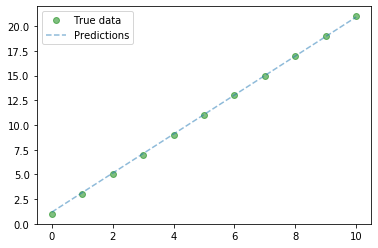

In [34]:
import matplotlib.pyplot as plt
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [43]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

AttributeError: Cannot load _jvm from SparkContext. Is SparkContext initialized?